In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline
from pandas_profiling import ProfileReport

In [2]:
data= pd.read_csv("employee_promotion.csv")

In [3]:
profile = ProfileReport(data)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [6]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.712238,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.521910,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [7]:
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

In [8]:
data.dropna(axis=0,inplace=True)
data.reset_index(drop=True,inplace=True)
data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46375,6915,Sales & Marketing,region_14,Bachelor's,m,other,2,31,1.0,2,0,49.0,0
46376,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
46377,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
46378,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0


In [9]:
data.drop(columns=['employee_id'], inplace=True)
data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [10]:
num_features=[i for i in data.columns if data.dtypes[i]!='object']
num_features

['no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'awards_won',
 'avg_training_score',
 'is_promoted']

In [11]:
cat_features = [i for i in data.columns if data.dtypes[i]=='object']
data[cat_features].nunique()

department              9
region                 34
education               3
gender                  2
recruitment_channel     3
dtype: int64

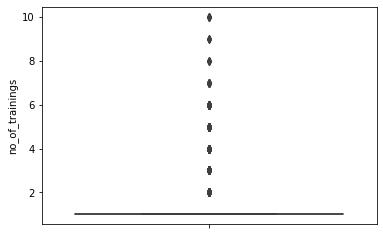

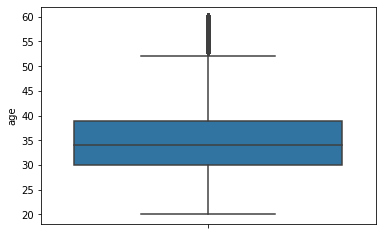

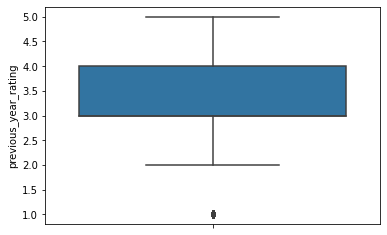

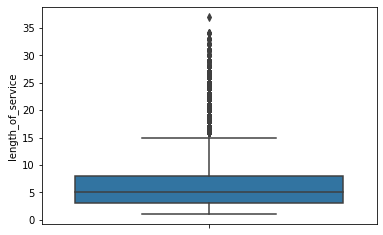

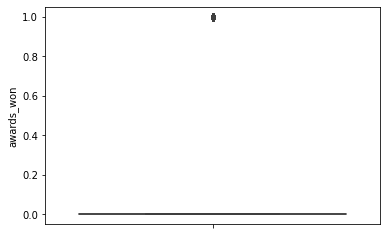

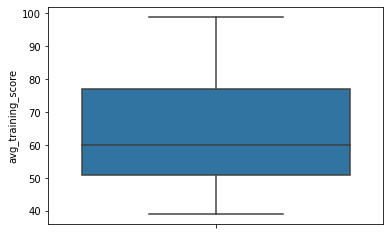

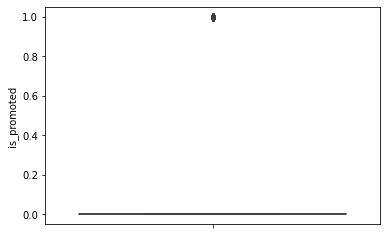

In [12]:
for i in num_features:
    plt.figsize=(10,5)
    sns.boxplot(y = data[i])
    plt.show()

### Plotting Q-Q Plot

In [13]:
import scipy.stats as stat
import pylab

In [14]:
def plot_curve(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

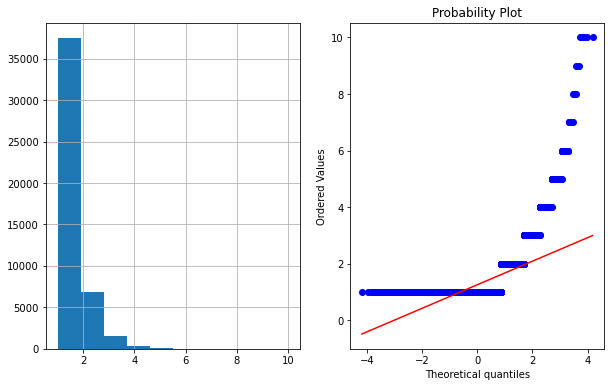

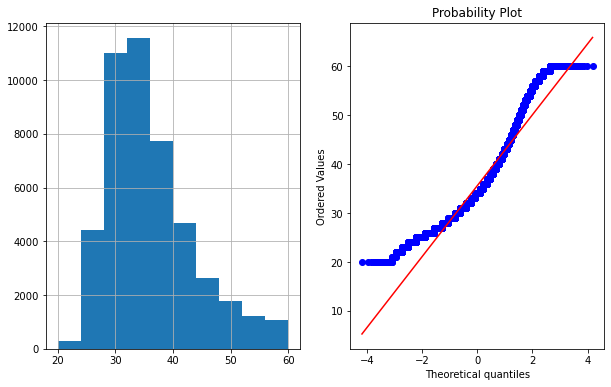

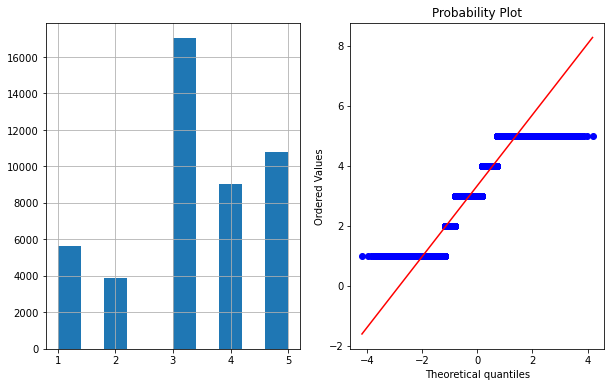

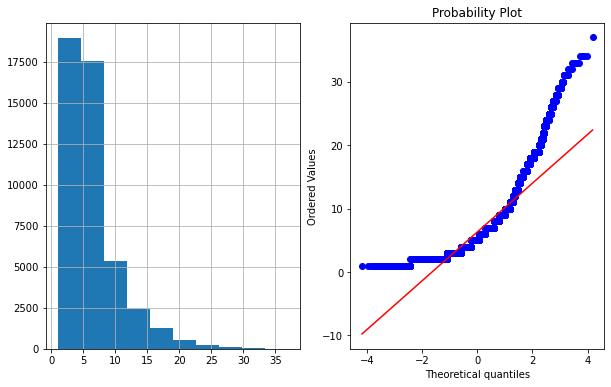

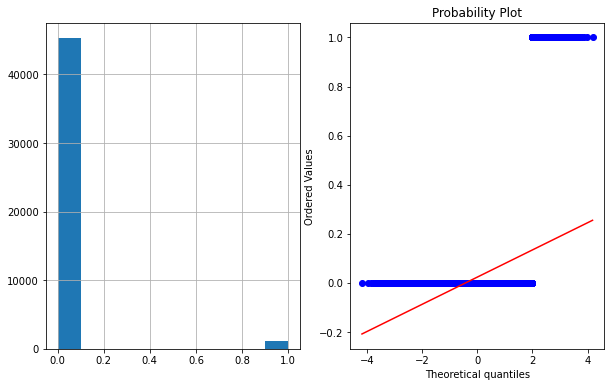

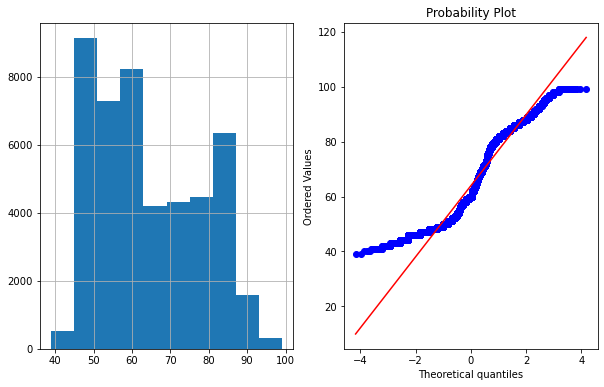

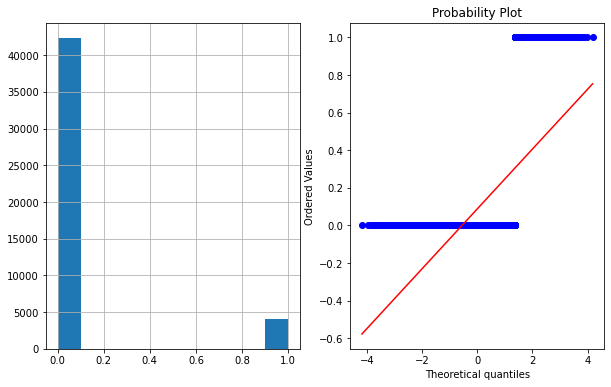

In [15]:
for feature in num_features:
    plot_curve(data,feature)

In [16]:
age_log = np.log1p(data['age'])
service_log = np.log1p(data['length_of_service'])
score_log = np.log1p(data['avg_training_score'])

data.insert(6, 'age_log', age_log)
data.insert(9, 'length_of_service_log', service_log)
data.insert(12, 'avg_training_score_log', score_log)

data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age_log,age,previous_year_rating,length_of_service_log,length_of_service,awards_won,avg_training_score_log,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,3.583519,35,5.0,2.197225,8,0,3.912023,49.0,0
1,Operations,region_22,Bachelor's,m,other,1,3.433987,30,5.0,1.609438,4,0,4.110874,60.0,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,3.555348,34,3.0,2.079442,7,0,3.931826,50.0,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,3.688879,39,1.0,2.397895,10,0,3.931826,50.0,0
4,Technology,region_26,Bachelor's,m,other,1,3.828641,45,3.0,1.098612,2,0,4.304065,73.0,0


C:\Users\VICKY R R\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\VICKY R R\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\VICKY R R\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

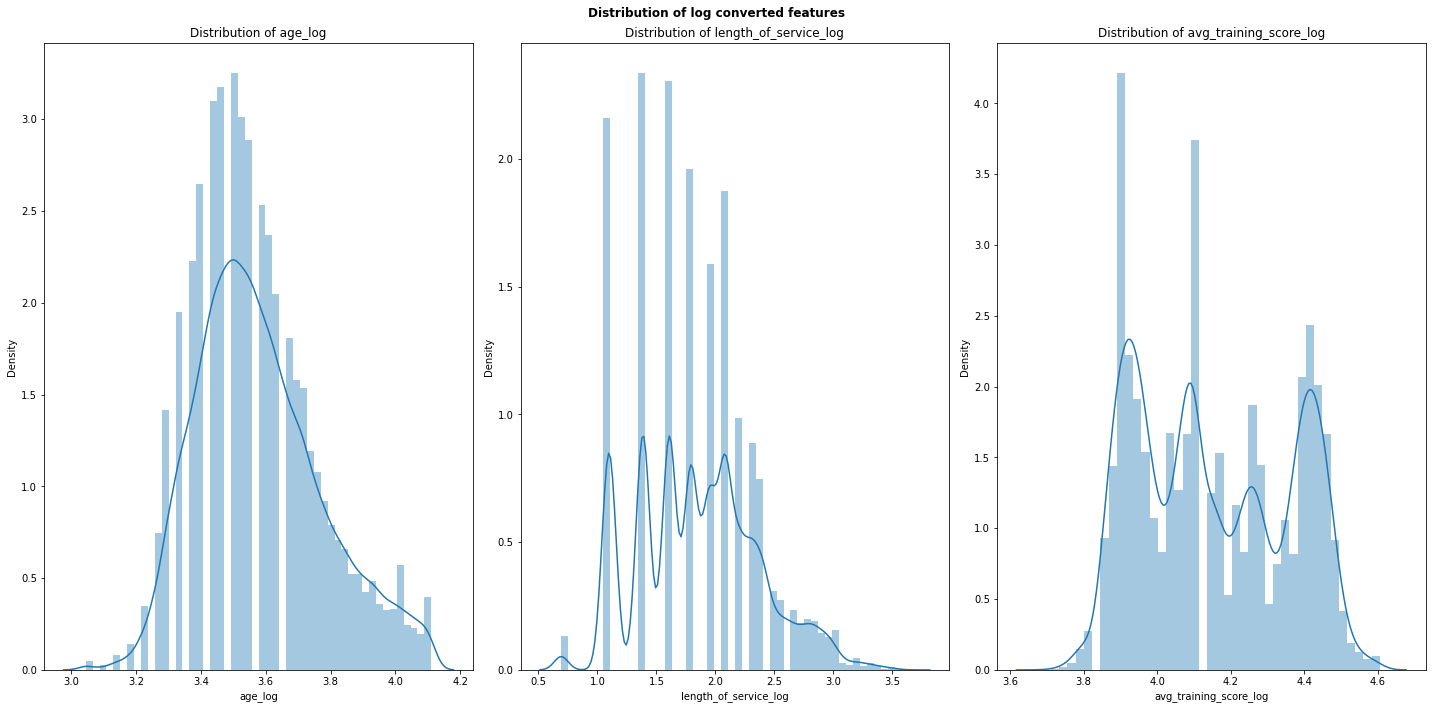

In [17]:
log_columns = ['age_log', 'length_of_service_log', 'avg_training_score_log']

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))

sns.distplot(data['age_log'], ax=ax1)
ax1.set_title('Distribution of age_log')
sns.distplot(data['length_of_service_log'], ax=ax2)
ax2.set_title('Distribution of length_of_service_log')
sns.distplot(data['avg_training_score_log'], ax=ax3)
ax3.set_title('Distribution of avg_training_score_log')

plt.suptitle('Distribution of log converted features', fontweight='bold')
plt.tight_layout()
plt.show()

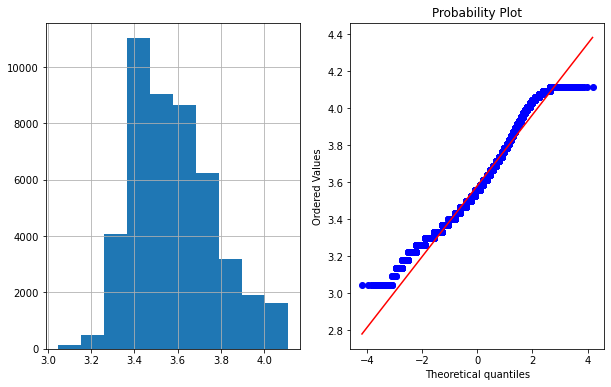

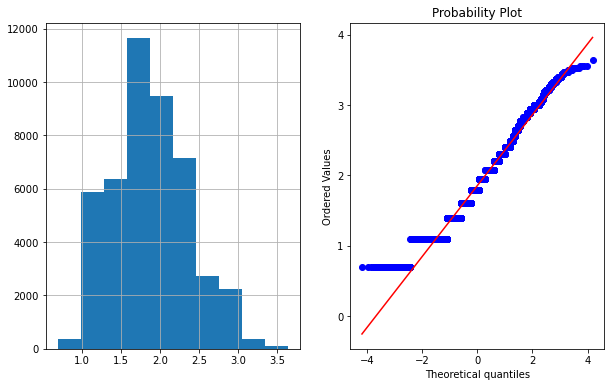

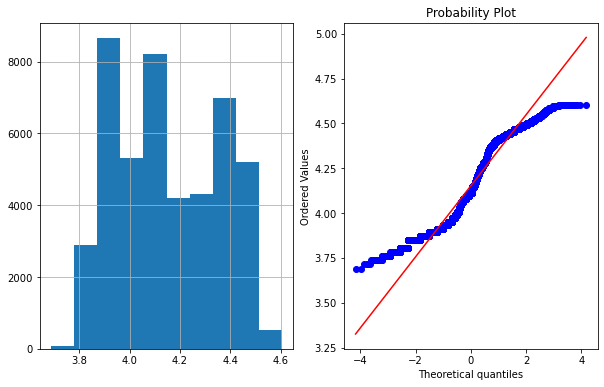

In [18]:
for feature in log_columns:
    plot_curve(data,feature)

<AxesSubplot:title={'center':'Correlation of features'}>

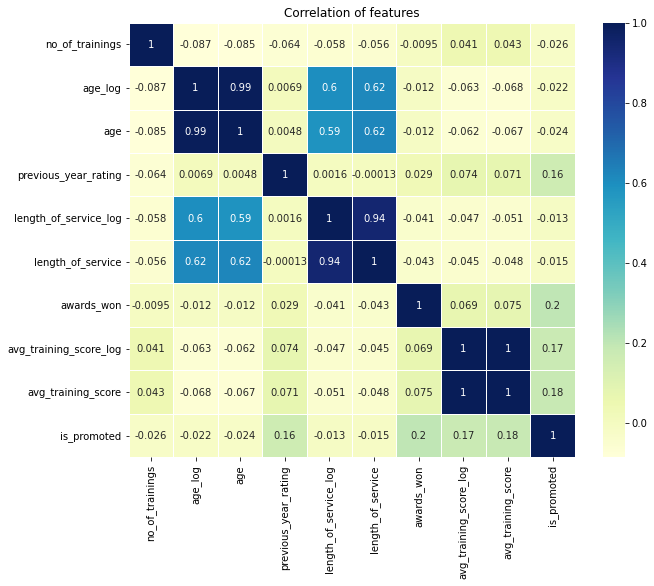

In [19]:
plt.figure(figsize=(10, 8))
plt.title('Correlation of features')
sns.heatmap(data.corr(), annot=True, linewidths=.5, cmap="YlGnBu")

In [20]:
data_encoded = pd.get_dummies(data)
data_encoded.head()

,no_of_trainings,age_log,age,previous_year_rating,length_of_service_log,length_of_service,awards_won,avg_training_score_log,avg_training_score,is_promoted,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,3.583519,35,5.0,2.197225,8,0,3.912023,49.0,0,...,0,0,0,0,1,1,0,0,0,1
1,1,3.433987,30,5.0,1.609438,4,0,4.110874,60.0,0,...,0,0,1,0,0,0,1,1,0,0
2,1,3.555348,34,3.0,2.079442,7,0,3.931826,50.0,0,...,0,0,1,0,0,0,1,0,0,1
3,2,3.688879,39,1.0,2.397895,10,0,3.931826,50.0,0,...,0,0,1,0,0,0,1,1,0,0
4,1,3.828641,45,3.0,1.098612,2,0,4.304065,73.0,0,...,0,0,1,0,0,0,1,1,0,0


In [21]:
from sklearn.preprocessing import StandardScaler
features = np.array(data_encoded.columns).reshape(-1, 1)

for feature in features:
    scaler = StandardScaler()
    scaler.fit(data_encoded[feature])
    data_encoded[feature] = scaler.transform(data_encoded[feature])

data_encoded.head()

,no_of_trainings,age_log,age,previous_year_rating,length_of_service_log,length_of_service,awards_won,avg_training_score_log,avg_training_score,is_promoted,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,-0.418611,0.019377,-0.076052,1.324653,0.673784,0.402667,-0.155136,-1.177045,-1.111888,-0.310195,...,-0.109043,-0.083089,-1.474410,-0.09548,1.505848,1.518245,-1.518245,-1.117074,-0.146768,1.166064
1,-0.418611,-0.749600,-0.740379,1.324653,-0.474482,-0.549239,-0.155136,-0.202848,-0.292548,-0.310195,...,-0.109043,-0.083089,0.678237,-0.09548,-0.664078,-0.658655,0.658655,0.895195,-0.146768,-0.857586
2,-0.418611,-0.125493,-0.208918,-0.263965,0.443690,0.164690,-0.155136,-1.080029,-1.037403,-0.310195,...,-0.109043,-0.083089,0.678237,-0.09548,-0.664078,-0.658655,0.658655,-1.117074,-0.146768,1.166064
3,1.226184,0.561202,0.455409,-1.852582,1.065803,0.878619,-0.155136,-1.080029,-1.037403,-0.310195,...,-0.109043,-0.083089,0.678237,-0.09548,-0.664078,-0.658655,0.658655,0.895195,-0.146768,-0.857586
4,-0.418611,1.279937,1.252601,-0.263965,-1.472401,-1.025192,-0.155136,0.743621,0.675764,-0.310195,...,-0.109043,-0.083089,0.678237,-0.09548,-0.664078,-0.658655,0.658655,0.895195,-0.146768,-0.857586


In [22]:
x = data_encoded.drop(columns=['is_promoted'], inplace=False)
y = data_encoded['is_promoted'].astype(int)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)

In [24]:
print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (37104, 60)
Shape of X_test:  (9276, 60)
Shape of y_train:  (37104,)
Shape of y_test:  (9276,)


In [25]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, confusion_matrix, f1_score, precision_recall_curve, roc_curve, plot_roc_curve, plot_precision_recall_curve

In [26]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average="macro")
    recall = recall_score(y_test, pred, average="macro")
    f1 = f1_score(y_test, pred, average="macro")
    roc_auc = roc_auc_score(y_test, pred_proba, average="macro")
    print('Confusion Matrix')
    print(confusion)
    print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [28]:
dt_clf = DecisionTreeClassifier()

In [29]:
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_pred_proba = dt_clf.predict_proba(X_test)[:, 1]

In [30]:
get_clf_eval(y_test, dt_pred, dt_pred_proba)

Confusion Matrix
[[7882  591]
 [ 437  366]]
Accuracy: 0.8892, Precision: 0.6650, Recall 0.6930, F1: 0.6773, AUC:0.6929


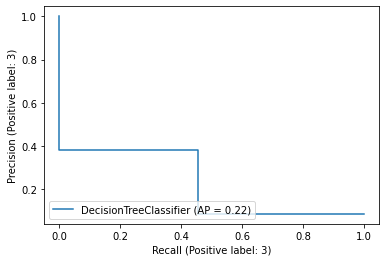

In [31]:
plot_precision_recall_curve(dt_clf, X_test, y_test)

In [32]:
lr_clf = LogisticRegression()

In [33]:
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

In [34]:
get_clf_eval(y_test, lr_pred, lr_pred_proba)

Confusion Matrix
[[8458   15]
 [ 515  288]]
Accuracy: 0.9429, Precision: 0.9466, Recall 0.6784, F1: 0.7452, AUC:0.8070


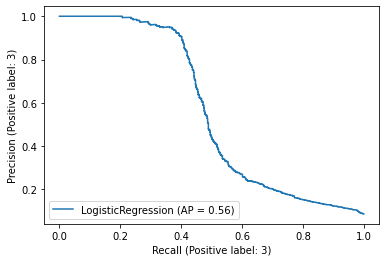

In [35]:
plot_precision_recall_curve(lr_clf, X_test, y_test)

In [36]:
rf_clf = RandomForestClassifier()

In [37]:
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)[:, 1]

In [38]:
get_clf_eval(y_test, rf_pred, rf_pred_proba)

Confusion Matrix
[[8446   27]
 [ 506  297]]
Accuracy: 0.9425, Precision: 0.9301, Recall 0.6833, F1: 0.7482, AUC:0.7975


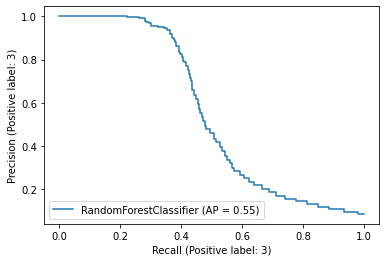

In [39]:
plot_precision_recall_curve(rf_clf, X_test, y_test)